In [1]:
import pandas as pd 
import numpy as np
import os
import pyprind
import matplotlib.pyplot as plt
import re
import itertools
import datetime
import csv
import nltk
from nltk.corpus import stopwords

## Reading Data from CSV 

In [2]:
dataframe = pd.read_csv('clean_reviews.csv')
dataframe.head()

,review,sentiment,processed_text
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1,teenager martha moxley maggie grace move high...
1,This is a terrible film. Angie Dickenson is a ...,0,terrible film angie dickenson class act always...
2,"This is supposed to be Charlie's masterpiece, ...",0,supposed charlies masterpiece contend actually...
3,"In order for a thriller to elicit fear, suspen...",0,order thriller elicit fear suspense emotion st...
4,The Perfect Son is a story about two 30-someth...,1,perfect son story two something brother one se...


## Data Distribution

Text(0, 0.5, 'Sentiment')

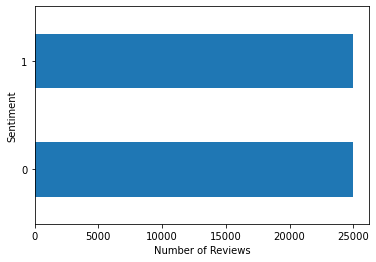

In [3]:
ax = dataframe['sentiment'].value_counts(sort=False).plot(kind='barh')
ax.set_xlabel('Number of Reviews')
ax.set_ylabel('Sentiment')

## Wordcloud

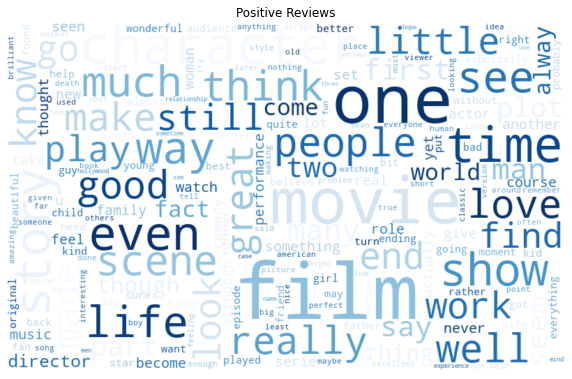

In [4]:
from wordcloud import WordCloud
normal_words =' '.join([text for text in dataframe['processed_text'][dataframe['sentiment'] == 1]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,colormap='Blues',background_color='White').generate(normal_words) 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear") 
plt.title("Positive Reviews")
plt.axis('off') 
plt.show()

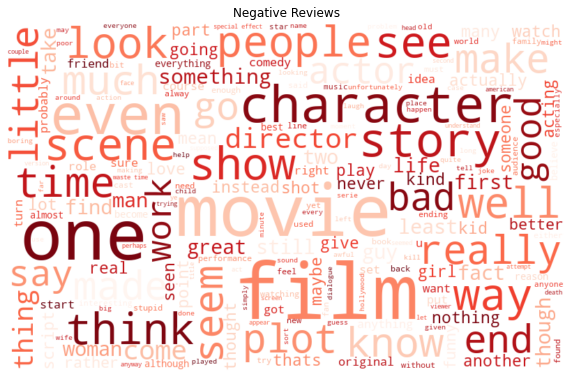

In [5]:
normal_words =' '.join([text for text in dataframe['processed_text'][dataframe['sentiment'] == 0]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,colormap='Reds',background_color='White').generate(normal_words) 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear") 
plt.title("Negative Reviews")
plt.axis('off') 
plt.show()

### Bigrams

In [11]:
text_content = dataframe['processed_text'].tolist()
bigrams_list = list(nltk.bigrams(text_content))
dictionary2 = [' '.join(tup) for tup in bigrams_list]

vectorizer = CountVectorizer(ngram_range=(2, 2))
bag_of_words = vectorizer.fit_transform(dictionary2)
vectorizer.vocabulary_
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
#print (words_freq[:100])
words_dict = dict(words_freq)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


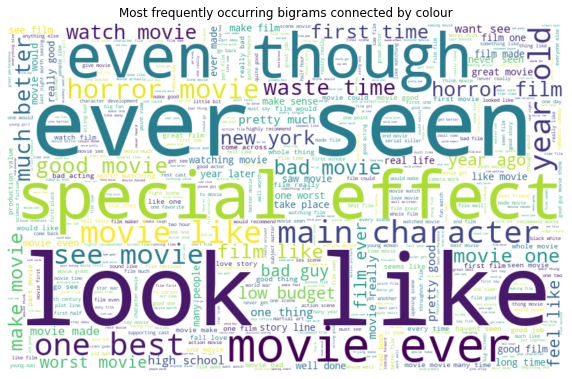

In [12]:
nltk.download('stopwords')
stopwordsList = stopwords.words('english')
stopwordsList.append('br')

wordCloud = WordCloud(max_words=500, height=500, width=800,stopwords=stopwordsList,background_color='white')
wordCloud.generate_from_frequencies(words_dict)

plt.figure(figsize=(10, 7))
plt.title('Most frequently occurring bigrams connected by colour')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Frequency of Words using Bag of Words

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

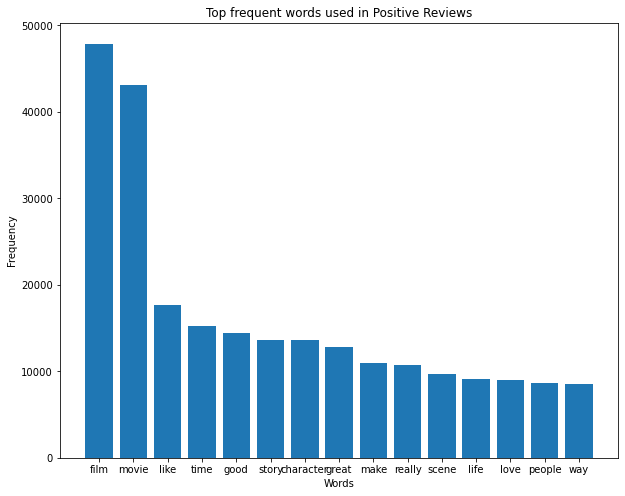

In [15]:
pos_bow = bow_vectorizer.fit_transform(dataframe['processed_text'][dataframe['sentiment'] == 1])
pos_top_sum=pos_bow.toarray().sum(axis=0)
pos_top_sum_cv=[pos_top_sum]#to let pandas know that these are rows
columns_cv = bow_vectorizer.get_feature_names()


import operator
dic = {}
for i in range(len(pos_top_sum_cv[0])):
    dic[columns_cv[i]]=pos_top_sum_cv[0][i]
sorted_dic=sorted(dic.items(),reverse=True,key=operator.itemgetter(1))

sorted_dic = sorted_dic[:15]
xs, ys = [*zip(*sorted_dic)]
plt.figure(figsize=(10,8))
plt.bar(xs, ys)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top frequent words used in Positive Reviews')
plt.show()


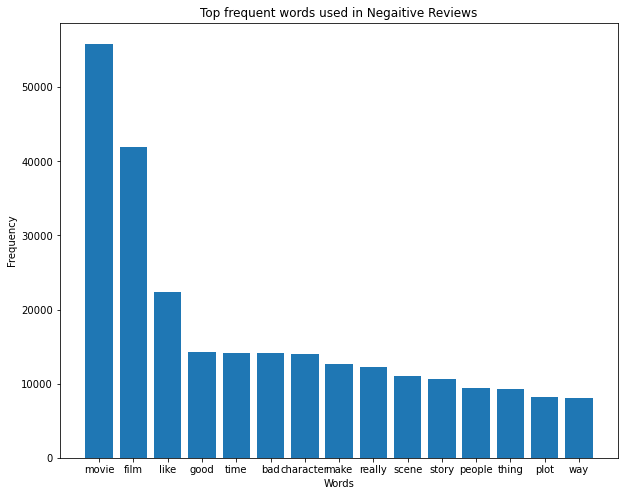

In [16]:
neg_bow = bow_vectorizer.fit_transform(dataframe['processed_text'][dataframe['sentiment'] == 0])
neg_top_sum=neg_bow.toarray().sum(axis=0)
neg_top_sum_cv=[neg_top_sum]#to let pandas know that these are rows
columns_cv = bow_vectorizer.get_feature_names()


import operator
dic = {}
for i in range(len(neg_top_sum_cv[0])):
    dic[columns_cv[i]]=neg_top_sum_cv[0][i]
sorted_dic=sorted(dic.items(),reverse=True,key=operator.itemgetter(1))

sorted_dic = sorted_dic[:15]
xs, ys = [*zip(*sorted_dic)]
plt.figure(figsize=(10,8))
plt.bar(xs, ys)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top frequent words used in Negaitive Reviews')
plt.show()

## Meta data analysis

In [17]:
# Total word count
dataframe['word_count'] = dataframe['processed_text'].apply(lambda x: len(str(x).split()))

# Unique_word_count
dataframe['unique_word_count'] = dataframe['processed_text'].apply(lambda x: len(set(str(x).split())))

# Stop_Word_count
dataframe['stop_word_count'] = dataframe['processed_text'].apply(lambda x: len([w for w in str(x).lower().split() if w in stopwordsList]))



In [18]:
import string
# Mean_word_length
dataframe['mean_word_length'] = dataframe['processed_text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# Char_count
dataframe['char_count'] = dataframe['processed_text'].apply(lambda x: len(str(x)))



C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

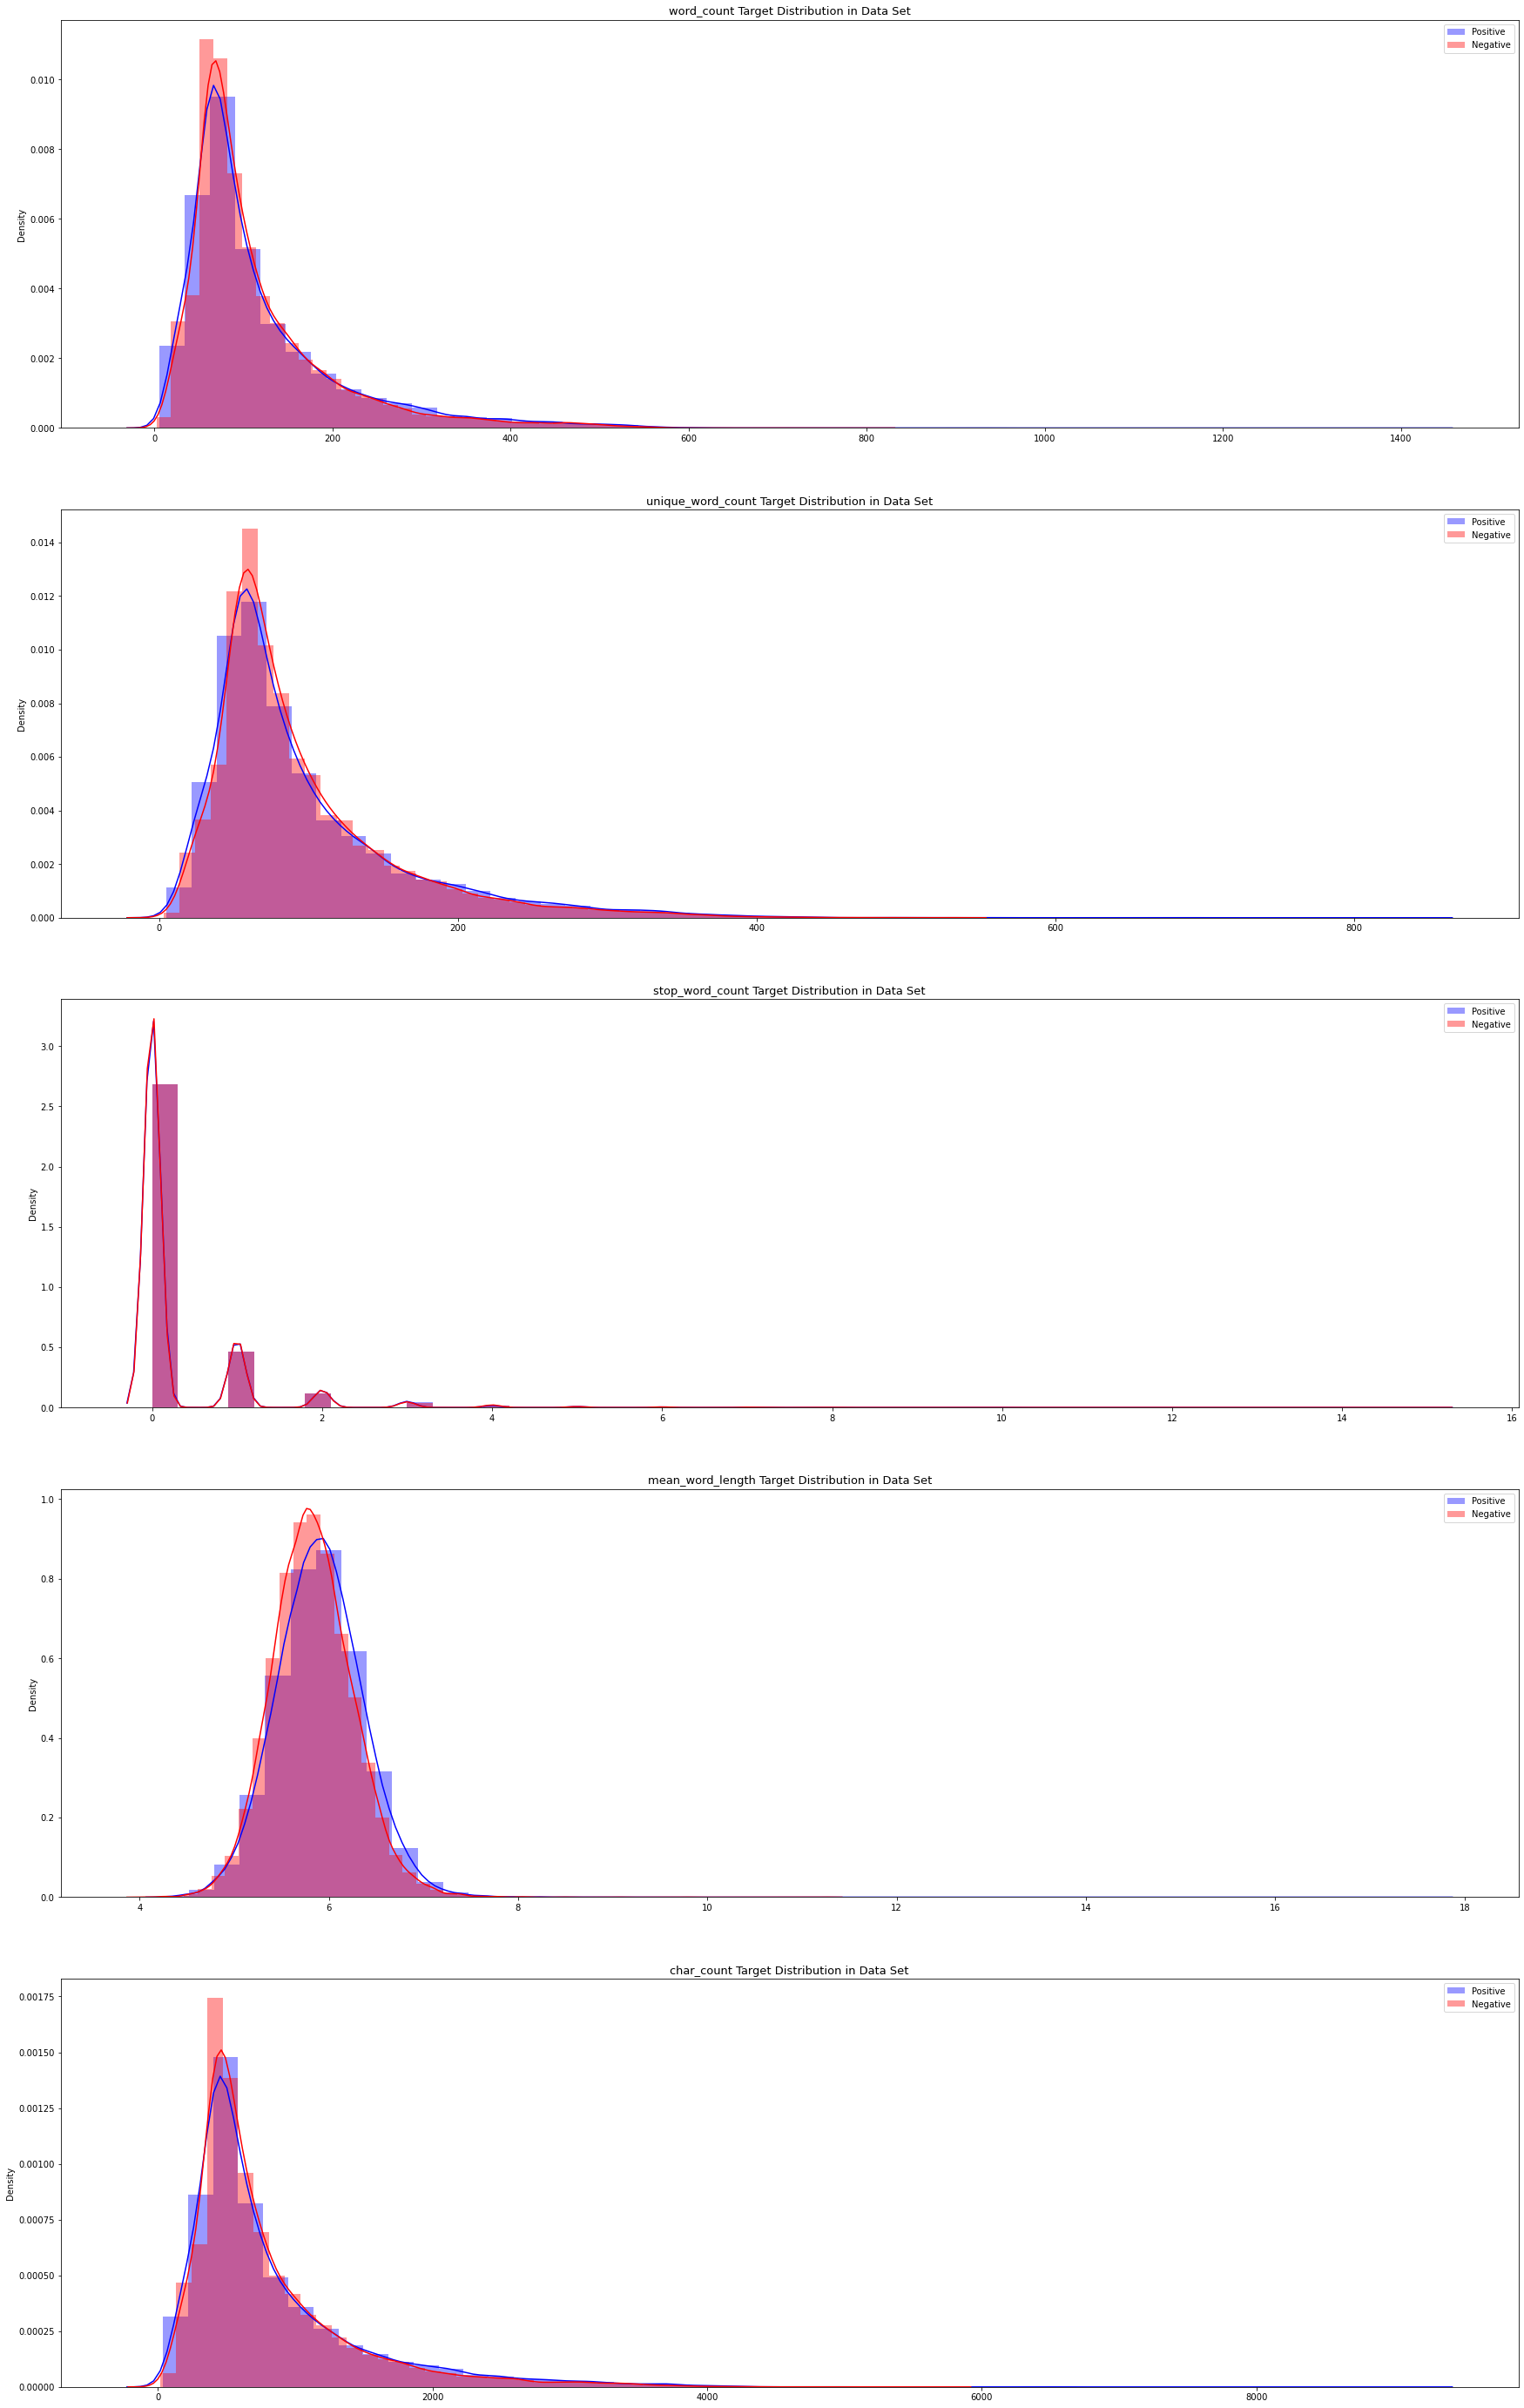

In [19]:
import seaborn as sns
METAFEATURES = ['word_count', 'unique_word_count', 'stop_word_count','mean_word_length','char_count']

pos = dataframe['sentiment'] == 1
neg = dataframe['sentiment'] == 0

fig, axes = plt.subplots(nrows=len(METAFEATURES), figsize=(30, 50))
for i, feature in enumerate(METAFEATURES):
    sns.distplot(dataframe.loc[pos][feature], label='Positive', ax=axes[i], color='blue')
    sns.distplot(dataframe.loc[neg][feature], label='Negative', ax=axes[i], color='red')
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', labelsize=10)
    axes[i].tick_params(axis='y', labelsize=10)
    axes[i].legend()
    axes[i].set_title(f'{feature} Target Distribution in Data Set', fontsize=13)

plt.show()

In [20]:
# Convert into a single CSV file.
dataframe.to_csv('./analysis_reviews.csv', index=False)
print("CVS file is created")

CVS file is created
